In [482]:
import numpy as np
import matplotlib.pyplot as plt

In [483]:
def meanX(data):
    return np.mean(data, axis=0) #axis=0表示按照列来求均值，如果输入list,则axis=1

In [484]:
#计算类内离散度矩阵子项si
def compute_si(xi):
    n = xi.shape[0]
    ui = meanX(xi)
    si = 0
    for i in range(0, n):
        si = si + ( xi[i, :] - ui).T * (xi[i, :] - ui )   
    return si

#计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX=np.vstack((x1,x2))#合并样本   
    print("dataX:", dataX)
    #计算均值
    u1=meanX(x1)
    u2=meanX(x2)    
    u=meanX(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb
    
        
def LDA(x1, x2):
    #计算类内离散度矩阵Sw
    s1 = compute_si(x1)
    s2 = compute_si(x2)     
    #Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2
    
    #计算类间离散度矩阵Sb
    #Sb=(n1*(m-m1).T*(m-m1)+n2*(m-m2).T*(m-m2))/(n1+n2)
    Sb = compute_Sb(x1, x2)
    
    #求最大特征值对应的特征向量    
    eig_value, vec = np.linalg.eig(np.mat(Sw).I*Sb)#特征值和特征向量
    index_vec = np.argsort(-eig_value)#对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1] #取出最大的特征值的索引
    w = vec[:, eig_index] #取出最大的特征值对应的特征向量
    return w

In [485]:
def createDataSet():  
    X1 = np.mat(np.random.random((30, 2)) * 5 + 7)  #类别A
    X2 = np.mat(np.random.random((30, 2)) * 5 + 2)   #类别B
    return X1, X2  

x1, x2 = createDataSet()

print('x1:',x1)
print('x2:',x2)

x1: [[11.17359919 10.07333889]
 [10.60814618  9.8558778 ]
 [ 9.32653019  9.33486424]
 [ 7.89714085  8.7886311 ]
 [10.15466087 10.22483399]
 [ 8.41688306 10.33508853]
 [ 7.16423497 10.47718475]
 [ 8.85712819  8.62473189]
 [ 7.16700134 11.86964428]
 [ 8.93342298 11.4400263 ]
 [11.59607089 10.3740514 ]
 [ 9.22674052  7.82198437]
 [11.18404935  7.47823451]
 [ 7.65643483  8.18104956]
 [ 7.54481811  7.99037452]
 [ 7.23508478  8.54430307]
 [ 8.60029973 11.96652577]
 [ 9.60496635  9.74554093]
 [ 8.36630334  7.53386742]
 [ 9.03676056 10.12759831]
 [ 7.0444713   8.62074073]
 [ 8.81072983  8.52988104]
 [ 9.14930593 11.29730218]
 [ 9.93334413  9.41108041]
 [ 9.26284895 10.6817977 ]
 [ 8.27044361 10.5308548 ]
 [ 8.70064142 11.1822376 ]
 [ 8.57504614 11.14396908]
 [ 8.30559618  8.76255578]
 [10.83075942  7.76712086]]
x2: [[3.46020668 6.43390383]
 [5.50815414 5.5771738 ]
 [4.55064067 3.4648517 ]
 [3.11445239 2.38619609]
 [5.97784789 5.47701255]
 [3.19644336 3.99825541]
 [4.52013794 3.41479358]
 [4.90

In [486]:
w = LDA(x1, x2)
print("w:",w)

dataX: [[11.17359919 10.07333889]
 [10.60814618  9.8558778 ]
 [ 9.32653019  9.33486424]
 [ 7.89714085  8.7886311 ]
 [10.15466087 10.22483399]
 [ 8.41688306 10.33508853]
 [ 7.16423497 10.47718475]
 [ 8.85712819  8.62473189]
 [ 7.16700134 11.86964428]
 [ 8.93342298 11.4400263 ]
 [11.59607089 10.3740514 ]
 [ 9.22674052  7.82198437]
 [11.18404935  7.47823451]
 [ 7.65643483  8.18104956]
 [ 7.54481811  7.99037452]
 [ 7.23508478  8.54430307]
 [ 8.60029973 11.96652577]
 [ 9.60496635  9.74554093]
 [ 8.36630334  7.53386742]
 [ 9.03676056 10.12759831]
 [ 7.0444713   8.62074073]
 [ 8.81072983  8.52988104]
 [ 9.14930593 11.29730218]
 [ 9.93334413  9.41108041]
 [ 9.26284895 10.6817977 ]
 [ 8.27044361 10.5308548 ]
 [ 8.70064142 11.1822376 ]
 [ 8.57504614 11.14396908]
 [ 8.30559618  8.76255578]
 [10.83075942  7.76712086]
 [ 3.46020668  6.43390383]
 [ 5.50815414  5.5771738 ]
 [ 4.55064067  3.4648517 ]
 [ 3.11445239  2.38619609]
 [ 5.97784789  5.47701255]
 [ 3.19644336  3.99825541]
 [ 4.52013794  3.4147

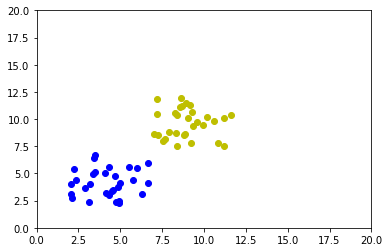

In [487]:
fig = plt.figure()  
plt.ylim(0, 20)  
plt.xlim(0, 20)  
#    ax = fig.add_subplot(111)  
#    ax.scatter(group[0,:].tolist(), group[1,:].tolist())  
plt.scatter(x1[:,0].tolist(),x1[:,1].tolist(),c='y')
plt.scatter(x2[:,0].tolist(),x2[:,1].tolist(),c='b')
plt.show()

In [488]:
nums = 500
def Testdataset():
    X1 = np.mat(np.random.random((nums, 2)) * 5 + 7)  #类别A
    X2 = np.mat(np.random.random((nums, 2)) * 5 + 2)   #类别B
    return X1, X2  
x1_test,x2_test = Testdataset()
y_true = []
for i in range(nums*2):
    if i< (nums):
        y_true.append(1)
    else:
        y_true.append(0)
#print(y_true)

In [489]:
u1=meanX(x1)
u2=meanX(x2) 
c1 = np.dot(w.T,u1.T)
c2 = np.dot(w.T,u2.T)
X = np.vstack((x1_test,x2_test))
print('X_test:',X)

X_test: [[11.71372945 11.68179591]
 [ 9.29141582 11.40328866]
 [ 8.50269788  9.32443882]
 ...
 [ 3.4441044   4.53533913]
 [ 4.03323959  6.40425151]
 [ 5.66580117  2.89459863]]


In [490]:
def Test(X,Y_true,w):
    y_pre = []
    print(len(X))
    for i in range(len(X)):
        y_proj = np.dot(w.T,X[i,:].T)
        d1 = abs(y_proj-c1)
        d2 = abs(y_proj-c2)
        if(d1 >= d2):
            y_pre.append(0)
        else:
            y_pre.append(1)
    count = 0
    for i in range(len(X)):
        if(y_pre[i] == y_true[i]):
            count += 1
    precise = count/len(X)
#    print(y_pre)
    print("Test precise:", precise)
    return precise

In [491]:
Test(X,y_true,w)

1000
Test precise: 0.999


0.999